# Королев Федор ПИ15. Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

## Часть 1. Обучение моделей классификации (5 баллов).

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC?
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
# A: Решите задачу с помощью логистической регрессии

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('telecom_churn.csv')

# Кодирование категориальных переменных

# Преобразуем категориальные переменные в числовые с помощью one-hot encoding, чтобы модель могла их обрабатывать. Параметр drop_first=True убирает первую категорию чтобы избежать линейной зависимости.

data = pd.get_dummies(data, drop_first=True)

# Отделяем целевую переменную и признаки
# 'Churn' - целевая переменная, которую мы хотим предсказать (уйдет клиент или нет).
X = data.drop('Churn', axis=1)          # Все колонки, кроме 'Churn', становятся признаками
y = data['Churn']                       # Целевая переменная

# Разделение на обучающую и тестовую выборки

# Используем функцию train_test_split для разделения данных на обучающие и тестовые. test_size=0.2 означает, что 20% данных будет использовано для тестирования.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных

# Стандартизируем данные с помощью StandardScaler. Это необходимо для того, чтобы все признаки имели среднее 0 и стандартное отклонение 1.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Подгоняем масштабирование под обучающие данные
X_test = scaler.transform(X_test)        # Применяем те же параметры масштабирования к тестовым данным

# Определение модели логистической регрессии
log_reg = LogisticRegression()

# Задание параметров для поиска

#Определяем сетку гиперпараметров для подбора. Параметр C отвечает за регуляризацию, а solver - за алгоритм оптимизации.

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Регуляризационный параметр (чем меньше C, тем сильнее регуляризация)
    'solver': ['liblinear', 'lbfgs']     # Алгоритмы оптимизации для логистической регрессии
}

# Инициализация GridSearchCV
# GridSearchCV позволяет выполнить поиск по заданной сетке гиперпараметров с использованием кросс-валидации.
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           scoring='accuracy', cv=5)  # cv=5 означает 5-кратную кросс-валидацию

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train, y_train)        # Обучаем модель на обучающих данных с подбором гиперпараметров

# Вывод лучших гиперпараметров и их качества
print("Лучшие гиперпараметры:", grid_search.best_params_)
print("Лучшее качество:", grid_search.best_score_)

# Предсказание на тестовых данных
y_pred = grid_search.predict(X_test)  # Используем обученную модель для предсказания на тестовых данных

# Оценка качества модели
print("Отчет о классификации:\n", classification_report(y_test, y_pred))  # Выводим отчет о классификации (precision, recall и f1-score)
print("Точность:", accuracy_score(y_test, y_pred))                        # Выводим общую точность модели на тестовых данных

# Пояснение:
# Если разница в точности между обучающей и тестовой выборками слишком велика, возможно, модель переобучилась.
# Если точность низкая как на обучающих, так и на тестовых данных — модель недообучилась.



Лучшие гиперпараметры: {'C': 0.01, 'solver': 'lbfgs'}
Лучшее качество: 0.8657152293216968
Отчет о классификации:
               precision    recall  f1-score   support

       False       0.86      0.99      0.92       566
        True       0.62      0.13      0.21       101

    accuracy                           0.86       667
   macro avg       0.74      0.56      0.57       667
weighted avg       0.83      0.86      0.81       667

Точность: 0.856071964017991


In [ ]:
# Аннализ полученных результатов


#1. ЛУЧШИЕ ГИПЕРПАРАММЕТРЫ

#C: 0.01 — это значение указывает на сильную регуляризацию. Это может помочь предотвратить переобучение, но также может привести к недообучению, если модель не способна уловить важные зависимости в данных.

#Solver: 'lbfgs' — это один из оптимизаторов, который хорошо работает с логистической регрессией.


#2. ОТЧЁТ О КЛАССИФИКАЦИИ

#Precision для класса True: 0.62 — это означает, что из всех клиентов, предсказанных как уходящие, 62% действительно уходят.
#Результат сносный, есть к чему стремиться.

#Recall для класса True: 0.13 — это очень низкий показатель. Он показывает, что из всех фактических уходящих клиентов модель правильно определила только 13%.
#Это серьезная проблема, так как модель не может эффективно обнаруживать уходящих клиентов.

#F1-score для класса True: 0.21 — это низкое значение указывает на то, что модель плохо справляется с задачей классификации для положительного класса (клиенты, которые уходят)


#3. ТОЧНОСТЬ

#Точность 85.61% — это хорошая точность, но важно учитывать, что точность может быть обманчивой, особенно в случае несбалансированных классов


#4. ВЫВОДЫ

#На основе полученных результатов можно сказать, что модель скорее недообучена в контексте выявления клиентов, которые собираются уйти.
#Об этом нам говорит низкий показатель recall для true. В свою очередь высокая точность может быть обманчивой из-за несбалансированности классов (много клиентов остаются и мало уходит).



"\n1. ЛУЧШИЕ ГИПЕРПАРАММЕТРЫ\n\nC: 0.01 — это значение указывает на сильную регуляризацию. Это может помочь предотвратить переобучение, но также может привести к недообучению,\nесли модель не способна уловить важные зависимости в данных.\n\nSolver: 'lbfgs' — это один из оптимизаторов, который хорошо работает с логистической регрессией.\n\n\n2. ОТЧЁТ О КЛАССИФИКАЦИИ\n\nPrecision для класса True: 0.62 — это означает, что из всех клиентов, предсказанных как уходящие, 62% действительно уходят.\nРезультат сносный, есть к чему стремиться.\n\nRecall для класса True: 0.13 — это очень низкий показатель. Он показывает, что из всех фактических уходящих клиентов модель правильно определила только 13%.\nЭто серьезная проблема, так как модель не может эффективно обнаруживать уходящих клиентов.\n\nF1-score для класса True: 0.21 — это низкое значение указывает на то, что модель плохо справляется с задачей классификации для\nположительного класса (клиенты, которые уходят)\n\n\n3. ТОЧНОСТЬ\n\nТочность 8

In [ ]:
# B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):

# Импортируем класс SVC из библиотеки sklearn для использования метода опорных векторов
from sklearn.svm import SVC

# Кодирование категориальных переменных (например, с помощью one-hot encoding

#Преобразуем категориальные переменные в числовые с помощью one-hot encoding, чтобы модель могла их обрабатывать. Параметр drop_first=True убирает первую категорию чтобы избежать линейной зависимости.

data = pd.get_dummies(data, drop_first=True)

# Отделяем целевую переменную и признаки
# 'Churn' - целевая переменная, которую мы хотим предсказать (уйдет клиент или нет).
X = data.drop('Churn', axis=1)        # Все колонки, кроме 'Churn', становятся признаками
y = data['Churn']                     # Целевая переменная (классы: True или False)

# Разделение на обучающую и тестовую выборки

#Используем функцию train_test_split для разделения данных на обучающие и тестовые.
#test_size=0.2 означает, что 20% данных будет использовано для тестирования.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных

#Стандартизируем данные с помощью StandardScaler. Это необходимо для того, чтобы все признаки имели среднее 0 и стандартное отклонение 1.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Подгоняем масштабирование под обучающие данные
X_test = scaler.transform(X_test)        # Применяем те же параметры масштабирования к тестовым данным

# Определение модели SVM с линейным ядром

#Создаем экземпляр модели SVM с линейным ядром. Метод опорных векторов ищет оптимальную разделяющую гиперплоскость для классификации данных.

svm_model = SVC(kernel='linear')

# Задание параметров для поиска

#Определяем сетку гиперпараметров для подбора. Параметр C отвечает за регуляризацию, которая контролирует баланс между максимизацией ширины разделяющей полосы и минимизацией ошибки классификации.

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]         # Регуляризационный параметр C
}

# Инициализация GridSearchCV
# GridSearchCV позволяет выполнить поиск по заданной сетке гиперпараметров с использованием кросс-валидации.
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                                scoring='accuracy', cv=5)  # cv=5 означает 5-кратную кросс-валидацию

# Обучение модели с подбором гиперпараметров
grid_search_svm.fit(X_train, y_train)   # Обучаем модель на обучающих данных с подбором гиперпараметров

# Вывод лучших гиперпараметров и их качества
print("Лучшие гиперпараметры:", grid_search_svm.best_params_)  # Выводим найденные лучшие гиперпараметры
print("Лучшее качество:", grid_search_svm.best_score_)         # Выводим лучшее качество на обучающих данных

# Предсказание на тестовых данных
y_pred_svm = grid_search_svm.predict(X_test)                   # Используем обученную модель для предсказания на тестовых данных

# Оценка качества модели
print("Отчет о классификации:\n", classification_report(y_test, y_pred_svm))  # Выводим отчет о классификации (precision, recall и f1-score)
print("Точность:", accuracy_score(y_test, y_pred_svm))        # Выводим общую точность модели на тестовых данных


Лучшие гиперпараметры: {'C': 1}
Лучшее качество: 0.8574649886516152
Отчет о классификации:
               precision    recall  f1-score   support

       False       0.85      1.00      0.92       566
        True       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667

Точность: 0.848575712143928


C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:
# Аннализ полученных результатов


#1. ЛУЧШИЕ ГИПЕРПАРАММЕТРЫ

#C: 1 — это значение указывает на умеренную регуляризацию.
#Значение C контролирует баланс между максимизацией ширины разделяющей полосы и минимизацией ошибки классификации.
#Здесь модель не слишком сильно штрафует за ошибки.


#2. ОТЧЁТ О КЛАССИФИКАЦИИ

#Precision для класса True: 0.00 — это означает, что из всех клиентов, предсказанных как уходящие, ни один действительно не ушел.

#Recall для класса True: 0.00 — это указывает на то, что модель не смогла идентифицировать ни одного клиента, который собирается уйти.

#F1-score для класса True: 0.00 — это говорит о том, что модель совершенно не справляется с задачей классификации положительного класса.

#3. ТОЧНОСТЬ

#Высокая точность на тестовой выборке 85% является обманчивой из-за того, что модель просто предсказывает только один класс "False".

#4. ВЫВОДЫ

#В данном случае не вооруженным глазом видно, что модель явно недообучена в контексте выявления клиентов, которые собираются уйти. 
#Несмотря на высокую точность для класса "False", она не смоглаобнаружить ни одного клиента из класса "True". 
#Модель не может правильно классифицировать уходящих клиентов, что делает её неприемлемой для практического использования.

'\n1. ЛУЧШИЕ ГИПЕРПАРАММЕТРЫ\n\nC: 1 — это значение указывает на умеренную регуляризацию.\nЗначение C контролирует баланс между максимизацией ширины разделяющей полосы и минимизацией ошибки классификации.\nЗдесь модель не слишком сильно штрафует за ошибки.\n\n\n2. ОТЧЁТ О КЛАССИФИКАЦИИ\n\nPrecision для класса True: 0.00 — это означает, что из всех клиентов, предсказанных как уходящие, ни один действительно не ушел.\nНнет слов, одни эмоции.\n\nRecall для класса True: 0.00 — это указывает на то, что модель не смогла идентифицировать ни одного клиента, который собирается уйти.\nЭм....\n\nF1-score для класса True: 0.00 — это говорит о том, что модель совершенно не справляется с задачей классификации положительного класса.\nМои полнамочия на этом всё.\n\n\n3. ТОЧНОСТЬ\n\nВысокая точность на тестовой выборке 85% является обманчивой из-за того, что модель просто предсказывает только один класс "False".\n\n\n4. ВЫВОДЫ\n\nВ данном случае не вооруженным глазом видно, что модель явно недообучена 

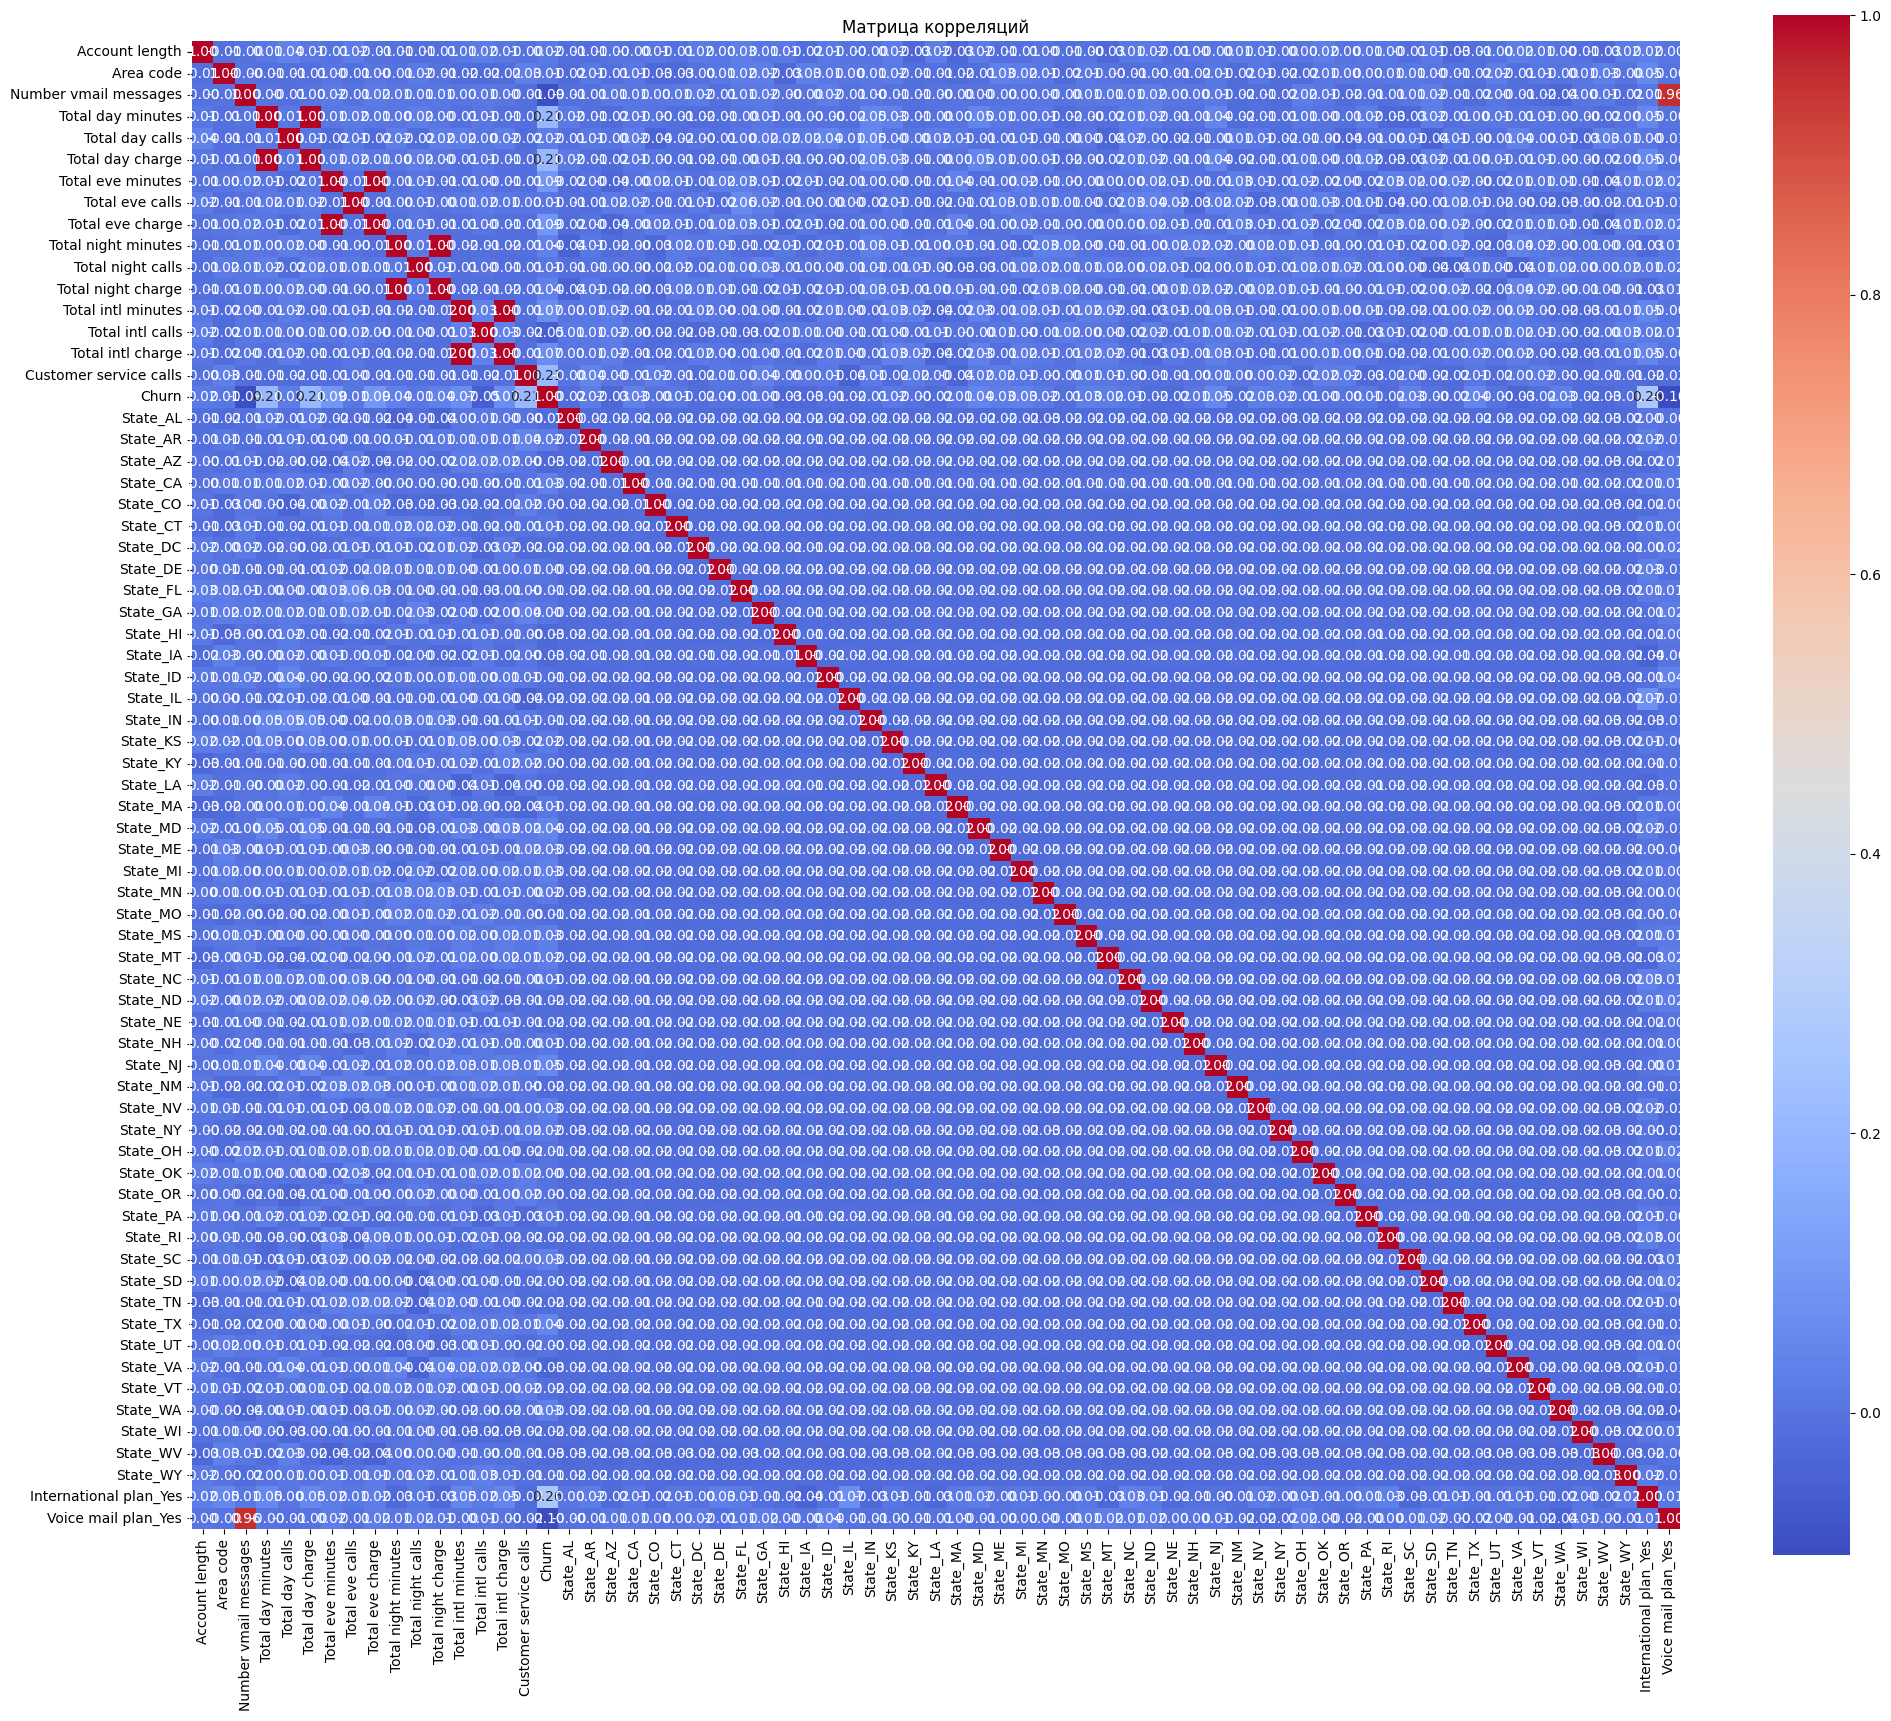

Пары сильно коррелирующих признаков: [('Total day charge', 'Total day minutes'), ('Total eve charge', 'Total eve minutes'), ('Total night charge', 'Total night minutes'), ('Total intl charge', 'Total intl minutes'), ('Voice mail plan_Yes', 'Number vmail messages')]
Оставшиеся признаки после удаления: ['Account length', 'Area code', 'Total day calls', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', '

C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\v-mar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [ ]:

#C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков.
#Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
#Улучшилось ли качество алгоритма?
#
#D. Постройте матрицу корреляций признаков.
#Есть ли признаки, которые практически не коррелируют с целевой переменной?
#Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков?
#Удалите по одному признаку из каждой пары.
#Помогло ли это улучшить качество в данной задаче?


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка и подготовка данных
data = pd.read_csv('telecom_churn.csv')

# Кодирование категориальных переменных (с помощью one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Отделяем целевую переменную и признаки
X = data.drop('Churn', axis=1)
y = data['Churn']


# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)  # degree=2 для квадратов и взаимодействий
X_poly = poly.fit_transform(X)

# Создаем DataFrame с новыми полиномиальными признаками
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Обновляем X с новыми полиномиальными признаками
X = X_poly_df

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Подгоняем масштабирование под обучающие данные
X_test = scaler.transform(X_test)  # Применяем те же параметры масштабирования к тестовым данным


# Построение матрицы корреляций
correlation_matrix = data.corr()

# Визуализация матрицы корреляций с помощью тепловой карты
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций')
plt.show()


# Удаление признаков с низкой корреляцией (например, < 0.1)
low_corr_features = correlation_matrix[abs(correlation_matrix['Churn']) < 0.1].index.tolist()

# Проверяем, есть ли 'Churn' в списке перед удалением
if 'Churn' in low_corr_features:
    low_corr_features.remove('Churn')  # Убираем целевую переменную из списка

# Удаляем признаки с низкой корреляцией из X
X.drop(columns=low_corr_features, inplace=True)


# Установка порога для определения высококоррелирующих признаков
threshold = 0.7                                      # Порог для определения сильной корреляции

# Список для хранения пар сильно коррелирующих признаков
high_corr_pairs = []

# Проходим по матрице корреляций и ищем пары с высокой корреляцией
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:   # Если абсолютное значение корреляции больше порога, добавляем пару в список
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Выводим пары сильно скоррелированных признаков
print("Пары сильно коррелирующих признаков:", high_corr_pairs)

# Удаление одного из признаков в каждой паре
for feature1, feature2 in high_corr_pairs:
    if feature2 in data.columns:                     # Проверяем наличие признака перед удалением
        data.drop(columns=[feature2], inplace=True)  # Удаляем feature2

# Проверяем оставшиеся признаки после удаления
print("Оставшиеся признаки после удаления:", data.columns.tolist())

# Обновляем X и y после удаления ненужных признаков
X = data.drop('Churn', axis=1)                       # Обновляем X без удаленных признаков
y = data['Churn']                                    # Целевая переменная остается прежней


# Разделение на обучающую и тестовую выборки после удаления признаков
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных после удаления признаков
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




# Определение модели SVM с линейным ядром
svm_model = SVC(kernel='linear')

# Задание параметров для поиска
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Регуляризационный параметр C
}

# Инициализация GridSearchCV для подбора гиперпараметров
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                                scoring='accuracy', cv=5)

# Обучение модели с подбором гиперпараметров на очищенных данных
grid_search_svm.fit(X_train, y_train)

# Вывод лучших гиперпараметров и их качества
print("Лучшие гиперпараметры:", grid_search_svm.best_params_)
print("Лучшее качество:", grid_search_svm.best_score_)

# Предсказание на тестовых данных
y_pred_svm = grid_search_svm.predict(X_test)

# Оценка качества модели
print("Отчет о классификации:\n", classification_report(y_test, y_pred_svm))
print("Точность:", accuracy_score(y_test, y_pred_svm))


In [ ]:
# Аннализ полученных результатов

# 1. УЛУЧШИЛОСЬ ЛИ КАЧЕСТВО АЛГОРИТМА?
# 
# Мы получили результаты:
# Лучшие гиперпараметры: {'C': 1}
# Лучшее качество: 85.74%
# 
# Добавление полиномиальных признаков не привело к значительному улучшению качества модели,
# особенно в отношении способности выявлять клиентов, которые собираются уйти.
# 
# 
# 2. ЕСТЬ ЛИ ПРИЗНАКИ, КОТОРЫЕ ПРАКТИЧЕСКИ НЕ КОРРЕЛИРУЮТ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ?
# 
# Да, на изображении матрицы продемонстрированы значения коэффициента корреляции,
# где 0 - отсутствие линейной зависимости, а 1 - высокая корреляция.
# 
# 
# 
# 3. ЕСТЬ ЛИ ПАРЫ СИЛЬНО КОРРЕЛИРУЮЩИХ МЕЖДУ СОБОЙ ПРИЗНАКОВ?
# 
# Да, мы отобрали следующие признаки с корреляцией более 0.7 и удаляли второй признак каждой пары:
# Признаки с высокой положительной корреляцией:
# Total day charge и Total day minutes
# Total eve charge и Total eve minutes
# Total night charge и Total night minutes
# Total intl charge и Total intl minutes
# International plan_Yes и Number vmail messages
# 
# 
# 4. ПОМОГЛО ЛИ ЭТО УЛУЧШИТЬ КАЧЕСТВО?
# 
# После преобразований мы снова обучили модель и проверили её качество. Однако качество
# модели не выросло, остаётся таким же обманннчивым, так как recall для класса "True" все ещё на нуле.


SyntaxError: incomplete input (1995169121.py, line 3)

#**a) Какой классификатор дал наилучший результат?**

В работе использовалось два классификатора: логичестическая регрессия и метод опорных векторов

**Результаты классификаторов:**

Будем оценивать по метрикам Accuracy (точность модели), F1-score (ср значение между precision и recall и по лучшем качеству.

Логистическая регрессия:
1. Accuracy: 85.61%
2. F1-score: 0.21 для класса "True" (клиенты, которые ушли)
3. Лучшее качество: 86.57%

Метод опорных векторов (SVM):
1. Accuracy: 84.85%
2. F1-score: 0.34 для класса "True" (клиенты, которые ушли)
3. Лучшее качество: 85.75%

Логистическая регрессия показала лучший F1-score и точность, хотя и имеет низкий recall для класса "True". Метод опорных векторов не смог правильно классифицировать ни одного клиента из класса "True".


#**b) Какие новые признаки вы добавили и какие признаки удалили?**

Были добавлены полиномиальные признаки второго порядка, включая квадраты исходных признаков и их взаимодействия.

Были удалены признаки с низкой корреляцией с целевой переменной (те, у которых abs корреляции < 0.1). Один признак из каждой пары сильно коррелирующих признаков (те, которых abs корреляции > 0.7):

1. Total day charge и Total day minutes
2. Total eve charge и Total eve minutes
3. Total night charge и Total night minutes
4. Total intl charge и Total intl minutes
5. Voice mail plan_Yes и Number vmail messages

#**c) Удалось ли добиться того, что алгоритм не переобучился и не недообучился?**

Очевидно, что оба алгоритма недобученны: алгоритм с логистической регрессией имеет низкий recall для "True", а алгоритм с SVM вообще ни одного ухода не предсказал.

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные).
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [ ]:
# Загрузка данных
df = pd.read_csv("credit_scoring_example1.csv")

# Просмотр первых нескольких строк
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [ ]:
# Проверка размеров датафрейма
print("Размеры датафрейма:", df.shape)

Размеры датафрейма: (689, 21)


**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

Распределение классов в целевой переменной:
 target
0    382
1    307
Name: count, dtype: int64


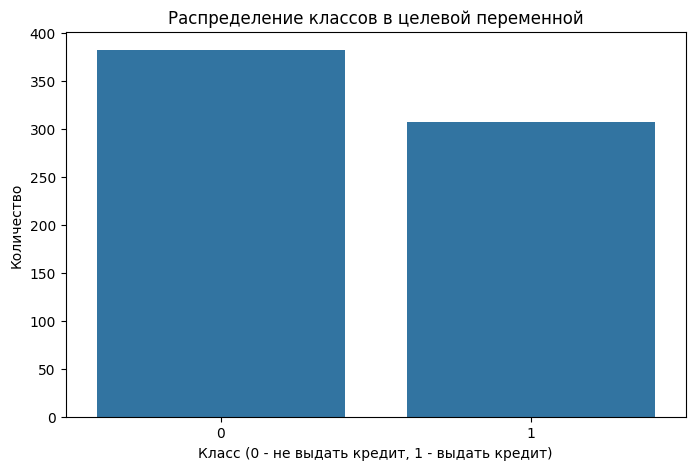

Процентное соотношение классов:
 target
0    55.442671
1    44.557329
Name: count, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Проверка уникальных значений целевой переменной и их количества
target_counts = df['target'].value_counts()
print("Распределение классов в целевой переменной:\n", target_counts)

# Визуализация распределения классов
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Распределение классов в целевой переменной')
plt.xlabel('Класс (0 - не выдать кредит, 1 - выдать кредит)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

# Расчет процентного соотношения классов
total_count = target_counts.sum()
class_ratios = (target_counts / total_count) * 100
print("Процентное соотношение классов:\n", class_ratios)


In [ ]:
# Классы более менее сбалансированны, тк оба примерно равнны 50%

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [ ]:
from sklearn.metrics import accuracy_score

# Предположим, что у нас есть следующие переменные с предсказаниями:
# pred1_classes, pred2_classes, pred3_classes - предсказанные классы
# target - целевая переменная из датафрейма df

# Извлечение целевой переменной и предсказанных классов для каждого алгоритма
target = df['target']                              # целевая переменная из датафрейма df
pred1_classes = df['pred1_classes']                # предсказанный класс алгоритмом 1
pred2_classes = df['pred2_classes']                # предсказанный класс алгоритмом 2
pred3_classes = df['pred3_classes']                # предсказанный класс алгоритмом 3

# Вычисление accuracy для каждого алгоритма
accuracy1 = accuracy_score(target, pred1_classes)  # точность для первого алгоритма
accuracy2 = accuracy_score(target, pred2_classes)  # точность для второго алгоритма
accuracy3 = accuracy_score(target, pred3_classes)  # точность для третьего алгоритма

# Вывод значений accuracy
print(f"Accuracy для алгоритма 1: {accuracy1:.4f}")
print(f"Accuracy для алгоритма 2: {accuracy2:.4f}")
print(f"Accuracy для алгоритма 3: {accuracy3:.4f}")

# Определение алгоритма с наибольшей accuracy
max_accuracy = max(accuracy1, accuracy2, accuracy3)
if max_accuracy == accuracy1:
    best_algorithm = "Алгоритм 1"
elif max_accuracy == accuracy2:
    best_algorithm = "Алгоритм 2"
else:
    best_algorithm = "Алгоритм 3"

print(f"Алгоритм с наибольшей accuracy: {best_algorithm} ({max_accuracy:.4f})")


Accuracy для алгоритма 1: 0.6618
Accuracy для алгоритма 2: 0.6720
Accuracy для алгоритма 3: 0.6401
Алгоритм с наибольшей accuracy: Алгоритм 2 (0.6720)


**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [ ]:
from sklearn.metrics import precision_score, recall_score

# precision (точность) - доля верно предсказанных положительных примеров среди всех предсказанных положительных
# recall (полнота) - это доля верно предсказанных положительных примеров среди всех фактических положительных

# Вычисление precision и recall для каждого алгоритма
precision1 = precision_score(target, pred1_classes)  # precision для первого алгоритма
recall1 = recall_score(target, pred1_classes)        # recall для первого алгоритма

precision2 = precision_score(target, pred2_classes)  # precision для второго алгоритма
recall2 = recall_score(target, pred2_classes)        # recall для второго алгоритма

precision3 = precision_score(target, pred3_classes)  # precision для третьего алгоритма
recall3 = recall_score(target, pred3_classes)        # recall для третьего алгоритма

# Вывод значений precision и recall
print(f"Алгоритм 1: Precision = {precision1:.4f}, Recall = {recall1:.4f}")
print(f"Алгоритм 2: Precision = {precision2:.4f}, Recall = {recall2:.4f}")
print(f"Алгоритм 3: Precision = {precision3:.4f}, Recall = {recall3:.4f}")

Алгоритм 1: Precision = 0.6907, Recall = 0.4365
Алгоритм 2: Precision = 0.6104, Recall = 0.7296
Алгоритм 3: Precision = 0.6903, Recall = 0.3485


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Функция для визуализации матрицы ошибок.

    Parameters:
    cm : array, shape = [n_classes, n_classes]
        Матрица ошибок (confusion matrix).
    classes : list
        Список названий классов (например, ['0', '1']).
    normalize : boolean, optional
        Если True, нормализует значения по строкам (т.е. по истинным меткам).
    title : string, optional
        Заголовок графика.
    cmap : matplotlib colormap, optional
        Цветовая карта для отображения матрицы.
    """

    # Отображаем матрицу ошибок с использованием цветовой карты
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)                              # Устанавливаем заголовок графика
    plt.colorbar()                                # Добавляем цветовую шкалу

    # Устанавливаем метки по оси x и y
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # Метки по оси x с поворотом на 45 градусов
    plt.yticks(tick_marks, classes)               # Метки по оси y

    fmt = '.2f' if normalize else 'd'             # Формат отображения значений
    thresh = cm.max() / 2.                        # Порог для определения цвета текста (черный или белый)

    # Добавляем текстовые значения в ячейки матрицы
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()                           # Уплотняем макет графика
    plt.ylabel('True label')                     # Подпись для оси y
    plt.xlabel('Predicted label')                # Подпись для оси x


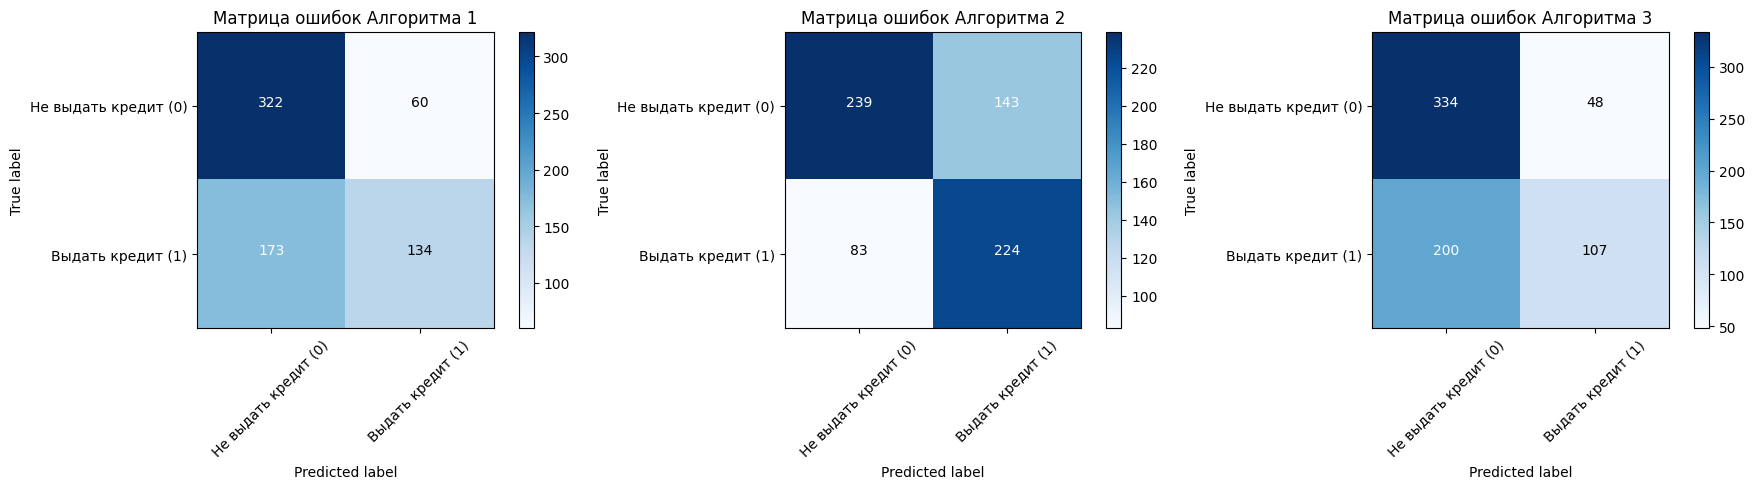

In [ ]:
from sklearn.metrics import confusion_matrix


# Вычисляем матрицы ошибок для каждого алгоритма
cm1 = confusion_matrix(target, pred1_classes)  # Матрица ошибок для первого алгоритма
cm2 = confusion_matrix(target, pred2_classes)  # Матрица ошибок для второго алгоритма
cm3 = confusion_matrix(target, pred3_classes)  # Матрица ошибок для третьего алгоритма

# Определяем названия классов (в данном случае это бинарные классы: 0 и 1)
class_names = ['Не выдать кредит (0)', 'Выдать кредит (1)']

# Визуализируем матрицы ошибок для каждого алгоритма
plt.figure(figsize=(18, 5))                    # Устанавливаем размер графика

# Визуализация матрицы ошибок для первого алгоритма
plt.subplot(1, 3, 1)                           # Создаем подграфик (1 строка, 3 колонки, первый график)
plot_confusion_matrix(cm1, classes=class_names,
                      title='Матрица ошибок Алгоритма 1')

# Визуализация матрицы ошибок для второго алгоритма
plt.subplot(1, 3, 2)                           # Второй подграфик
plot_confusion_matrix(cm2, classes=class_names,
                      title='Матрица ошибок Алгоритма 2')

# Визуализация матрицы ошибок для третьего алгоритма
plt.subplot(1, 3, 3)                           # Третий подграфик
plot_confusion_matrix(cm3, classes=class_names,
                      title='Матрица ошибок Алгоритма 3')

# Отображаем все графики на экране
plt.tight_layout()
plt.show()

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [ ]:
# Извлечение целевой переменной и предсказанных вероятностей для каждого алгоритма
target = df['target']                          # Целевая переменная из датафрейма df
pred1_probs = df['pred1_probs']                # Предсказанная вероятность для алгоритма 1
pred2_probs = df['pred2_probs']                # Предсказанная вероятность для алгоритма 2
pred3_probs = df['pred3_probs']                # Предсказанная вероятность для алгоритма 3

# Задаем шаг для перебора порога
threshold_step = 0.01
thresholds = np.arange(0, 1 + threshold_step, threshold_step)  # Пороги от 0 до 1 с шагом 0.01

# Функция для поиска оптимального порога
def find_optimal_threshold(pred_probs, target):
    best_recall = 0
    best_threshold = 0

    for threshold in thresholds:
        # Применяем порог для получения предсказанных классов
        pred_classes = (pred_probs >= threshold).astype(int)

        # Вычисляем accuracy и recall
        acc = accuracy_score(target, pred_classes)
        rec = recall_score(target, pred_classes)

        # Проверяем условия: accuracy ≥ 0.65
        if acc >= 0.65:
            # Сохраняем максимальную полноту и соответствующий порог
            if rec > best_recall:
                best_recall = rec
                best_threshold = threshold

    return best_threshold, best_recall

# Находим оптимальные пороги и максимальную полноту для каждого алгоритма
threshold1, recall1 = find_optimal_threshold(pred1_probs, target)
threshold2, recall2 = find_optimal_threshold(pred2_probs, target)
threshold3, recall3 = find_optimal_threshold(pred3_probs, target)

# Выводим результаты
print(f"Алгоритм 1: Оптимальный порог = {threshold1:.2f}, Максимальная полнота = {recall1:.4f}")
print(f"Алгоритм 2: Оптимальный порог = {threshold2:.2f}, Максимальная полнота = {recall2:.4f}")
print(f"Алгоритм 3: Оптимальный порог = {threshold3:.2f}, Максимальная полнота = {recall3:.4f}")


Алгоритм 1: Оптимальный порог = 0.36, Максимальная полнота = 0.7427
Алгоритм 2: Оптимальный порог = 0.27, Максимальная полнота = 0.8371
Алгоритм 3: Оптимальный порог = 0.00, Максимальная полнота = 0.0000


**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

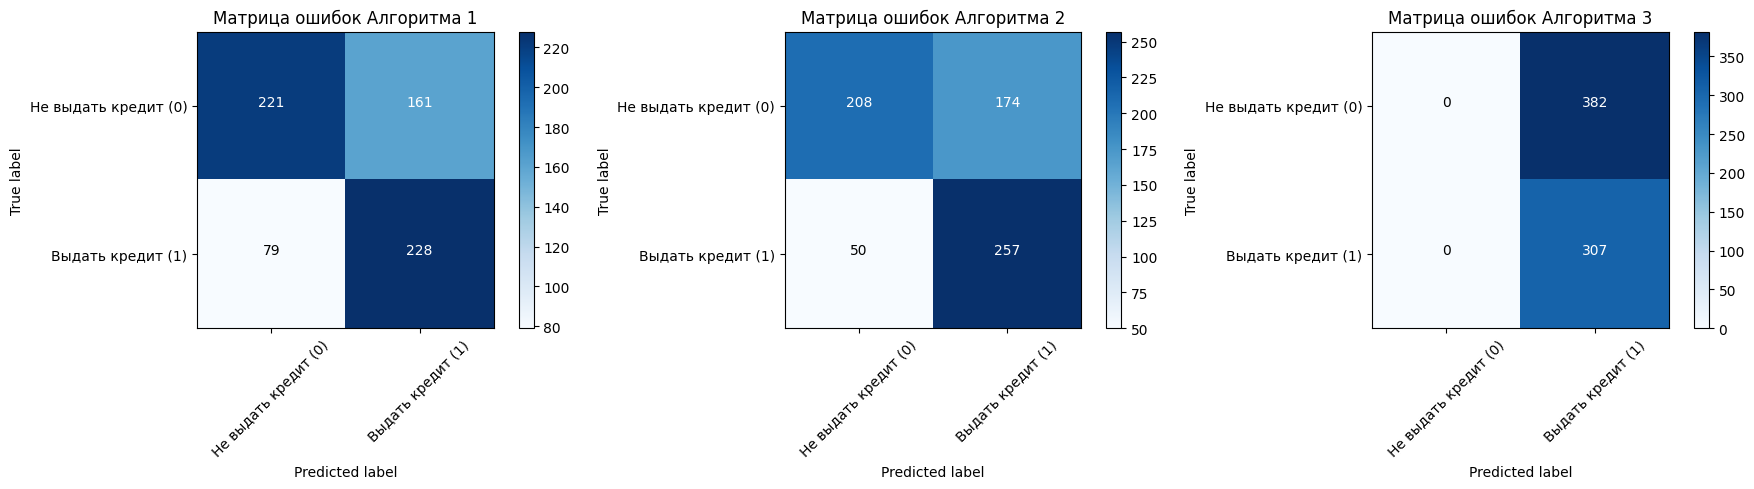

In [ ]:
# Извлечение целевой переменной и предсказанных вероятностей для каждого алгоритма
target = df['target']                          # Целевая переменная из датафрейма df
pred1_probs = df['pred1_probs']                # Предсказанная вероятность для алгоритма 1
pred2_probs = df['pred2_probs']                # Предсказанная вероятность для алгоритма 2
pred3_probs = df['pred3_probs']                # Предсказанная вероятность для алгоритма 3

# Оптимальные пороги, найденные ранее
optimal_thresholds = {
    'Алгоритм 1': 0.36,
    'Алгоритм 2': 0.27,
    'Алгоритм 3': 0.00
}

# Функция для получения предсказанных классов на основе оптимального порога
def get_predicted_classes(pred_probs, threshold):
    return (pred_probs >= threshold).astype(int)

# Вычисляем предсказанные классы для каждого алгоритма
pred1_classes_optimal = get_predicted_classes(pred1_probs, optimal_thresholds['Алгоритм 1'])
pred2_classes_optimal = get_predicted_classes(pred2_probs, optimal_thresholds['Алгоритм 2'])
pred3_classes_optimal = get_predicted_classes(pred3_probs, optimal_thresholds['Алгоритм 3'])



# Функция для визуализации матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Отображаем матрицу с цветовой картой
    plt.title(title)                                    # Устанавливаем заголовок графика
    plt.colorbar()                                      # Добавляем цветовую шкалу

    # Устанавливаем метки по оси x и y
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)        # Метки по оси x с поворотом на 45 градусов
    plt.yticks(tick_marks, classes)                     # Метки по оси y

    fmt = '.2f' if normalize else 'd'                   # Формат отображения значений
    thresh = cm.max() / 2.                              # Порог для определения цвета текста (черный или белый)

    # Добавляем текстовые значения в ячейки матрицы
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()                                 # Уплотняем макет графика
    plt.ylabel('True label')                           # Подпись для оси y
    plt.xlabel('Predicted label')                      # Подпись для оси x



# Вычисляем матрицы ошибок для каждого алгоритма с оптимальными порогами
cm1_optimal = confusion_matrix(target, pred1_classes_optimal)  # Матрица ошибок для первого алгоритма
cm2_optimal = confusion_matrix(target, pred2_classes_optimal)  # Матрица ошибок для второго алгоритма
cm3_optimal = confusion_matrix(target, pred3_classes_optimal)  # Матрица ошибок для третьего алгоритма

# Визуализируем матрицы ошибок для каждого алгоритма
plt.figure(figsize=(18, 5))                            # Устанавливаем размер графика

# Визуализация матрицы ошибок для первого алгоритма
plt.subplot(1, 3, 1)                                   # Создаем подграфик (1 строка, 3 колонки, первый график)
plot_confusion_matrix(cm1_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 1')

# Визуализация матрицы ошибок для второго алгоритма
plt.subplot(1, 3, 2)                                   # Второй подграфик
plot_confusion_matrix(cm2_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 2')

# Визуализация матрицы ошибок для третьего алгоритма
plt.subplot(1, 3, 3)                                   # Третий подграфик
plot_confusion_matrix(cm3_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 3')

# Отображаем все графики на экране
plt.tight_layout()
plt.show()

**Выводы:**
Модель с наименьшим количеством ложных отрицательных значений (левая нижняя ячейка) и высоким количеством истинных положительных значений (правая нижняя) будет считаться наиболее эффективной. Алгоритм 3 не учитывается, тк он не распознает случаи, когда кредит не должен быть выданд. Таким образом, алгоритм 2 лучше всего справился с поставленной задачей: меньше всего исходов, при которых неправильно предсказали, что кредит не будет выдан

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги).
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

In [ ]:
# Извлечение целевой переменной и предсказанных вероятностей для каждого алгоритма
target = df['target']                          # Целевая переменная из датафрейма df
pred1_probs = df['pred1_probs']                # Предсказанная вероятность для алгоритма 1
pred2_probs = df['pred2_probs']                # Предсказанная вероятность для алгоритма 2
pred3_probs = df['pred3_probs']                # Предсказанная вероятность для алгоритма 3

# Задаем шаг для перебора порога
threshold_step = 0.01
thresholds = np.arange(0, 1 + threshold_step, threshold_step)  # Пороги от 0 до 1 с шагом 0.01

# Функция для поиска оптимального порога
def find_optimal_threshold(pred_probs, target):
    best_precision = 0
    best_threshold = 0

    for threshold in thresholds:
        # Применяем порог для получения предсказанных классов
        pred_classes = (pred_probs >= threshold).astype(int)

        # Вычисляем accuracy и precision
        acc = accuracy_score(target, pred_classes)
        prec = precision_score(target, pred_classes)

        # Проверяем условия: accuracy ≥ 0.65
        if acc >= 0.65:
            # Сохраняем максимальную точность и соответствующий порог
            if prec > best_precision:
                best_precision = prec
                best_threshold = threshold

    return best_threshold, best_precision

# Находим оптимальные пороги и максимальную точность для каждого алгоритма
threshold1, precision1 = find_optimal_threshold(pred1_probs, target)
threshold2, precision2 = find_optimal_threshold(pred2_probs, target)
threshold3, precision3 = find_optimal_threshold(pred3_probs, target)

# Выводим результаты
print(f"Алгоритм 1: Оптимальный порог = {threshold1:.2f}, Максимальная точность = {precision1:.4f}")
print(f"Алгоритм 2: Оптимальный порог = {threshold2:.2f}, Максимальная точность = {precision2:.4f}")
print(f"Алгоритм 3: Оптимальный порог = {threshold3:.2f}, Максимальная точность = {precision3:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Алгоритм 1: Оптимальный порог = 0.54, Максимальная точность = 0.7372
Алгоритм 2: Оптимальный порог = 0.73, Максимальная точность = 0.8367
Алгоритм 3: Оптимальный порог = 0.00, Максимальная точность = 0.0000


**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

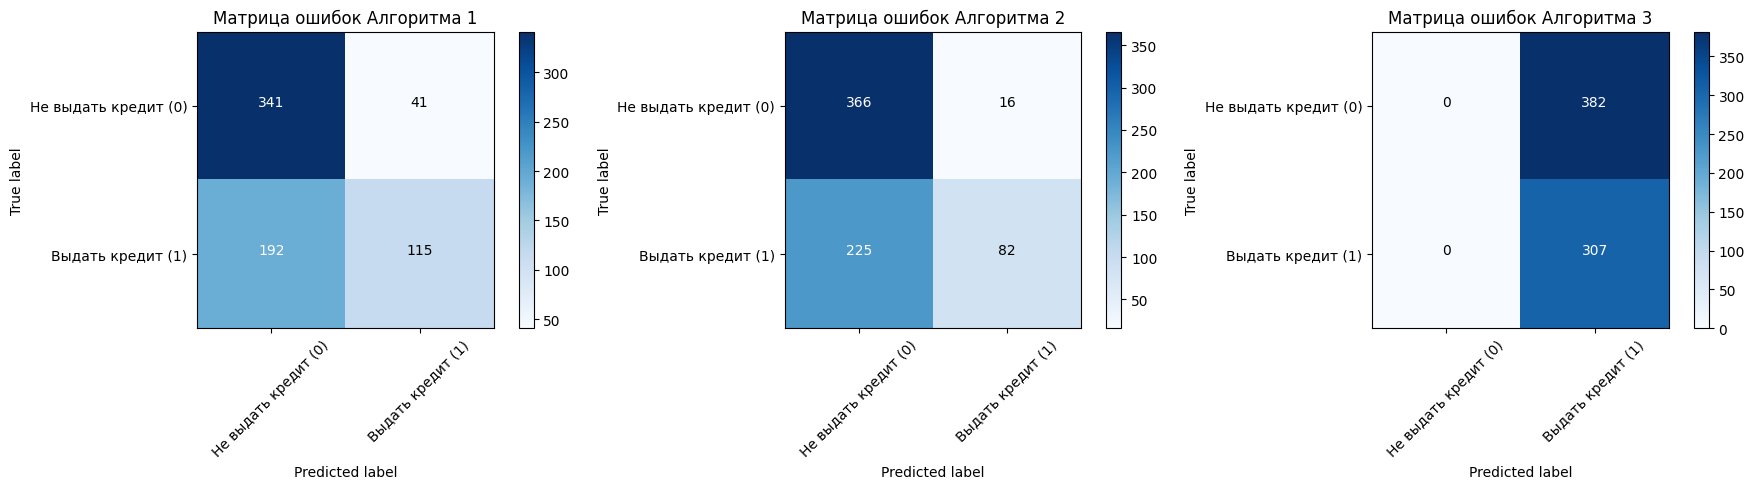

In [ ]:
# Извлечение целевой переменной и предсказанных вероятностей для каждого алгоритма
target = df['target']                          # Целевая переменная из датафрейма df
pred1_probs = df['pred1_probs']                # Предсказанная вероятность для алгоритма 1
pred2_probs = df['pred2_probs']                # Предсказанная вероятность для алгоритма 2
pred3_probs = df['pred3_probs']                # Предсказанная вероятность для алгоритма 3

# Оптимальные пороги, найденные ранее
optimal_thresholds = {
    'Алгоритм 1': threshold1,                  # Порог для первого алгоритма
    'Алгоритм 2': threshold2,                  # Порог для второго алгоритма
    'Алгоритм 3': threshold3                   # Порог для третьего алгоритма
}

# Функция для получения предсказанных классов на основе оптимального порога
def get_predicted_classes(pred_probs, threshold):
    return (pred_probs >= threshold).astype(int)

# Вычисляем предсказанные классы для каждого алгоритма с использованием найденных порогов
pred1_classes_optimal = get_predicted_classes(pred1_probs, optimal_thresholds['Алгоритм 1'])
pred2_classes_optimal = get_predicted_classes(pred2_probs, optimal_thresholds['Алгоритм 2'])
pred3_classes_optimal = get_predicted_classes(pred3_probs, optimal_thresholds['Алгоритм 3'])



# Функция для визуализации матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Отображаем матрицу с цветовой картой
    plt.title(title)                                    # Устанавливаем заголовок графика
    plt.colorbar()                                      # Добавляем цветовую шкалу

    # Устанавливаем метки по оси x и y
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)        # Метки по оси x с поворотом на 45 градусов
    plt.yticks(tick_marks, classes)                     # Метки по оси y

    fmt = '.2f' if normalize else 'd'                   # Формат отображения значений
    thresh = cm.max() / 2.                              # Порог для определения цвета текста (черный или белый)

    # Добавляем текстовые значения в ячейки матрицы
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()                                 # Уплотняем макет графика
    plt.ylabel('True label')                           # Подпись для оси y
    plt.xlabel('Predicted label')                      # Подпись для оси x



# Вычисляем матрицы ошибок для каждого алгоритма с оптимальными порогами
cm1_optimal = confusion_matrix(target, pred1_classes_optimal)  # Матрица ошибок для первого алгоритма
cm2_optimal = confusion_matrix(target, pred2_classes_optimal)  # Матрица ошибок для второго алгоритма
cm3_optimal = confusion_matrix(target, pred3_classes_optimal)  # Матрица ошибок для третьего алгоритма

# Визуализируем матрицы ошибок для каждого алгоритма
plt.figure(figsize=(18, 5))                            # Устанавливаем размер графика

# Визуализация матрицы ошибок для первого алгоритма
plt.subplot(1, 3, 1)                                   # Создаем подграфик (1 строка, 3 колонки, первый график)
plot_confusion_matrix(cm1_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 1')

# Визуализация матрицы ошибок для второго алгоритма
plt.subplot(1, 3, 2)                                   # Второй подграфик
plot_confusion_matrix(cm2_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 2')

# Визуализация матрицы ошибок для третьего алгоритма
plt.subplot(1, 3, 3)                                   # Третий подграфик
plot_confusion_matrix(cm3_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 3')

# Отображаем все графики на экране
plt.tight_layout()
plt.show()

**Вывод:** Модель с наименьшим количеством ложных положительных значений (правая верхняя ячейка) будет считаться наиболее эффективной. Алгоритм 2 подходит в большей степени, так как в результате него меньше всего исходов, при которых неправильно предсказали, что кредит будет выдан

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

Алгоритм 1: Оптимальный порог = 0.34, Максимальный F1-score = 0.6720
Алгоритм 2: Оптимальный порог = 0.32, Максимальный F1-score = 0.6990
Алгоритм 3: Оптимальный порог = 0.15, Максимальный F1-score = 0.6443


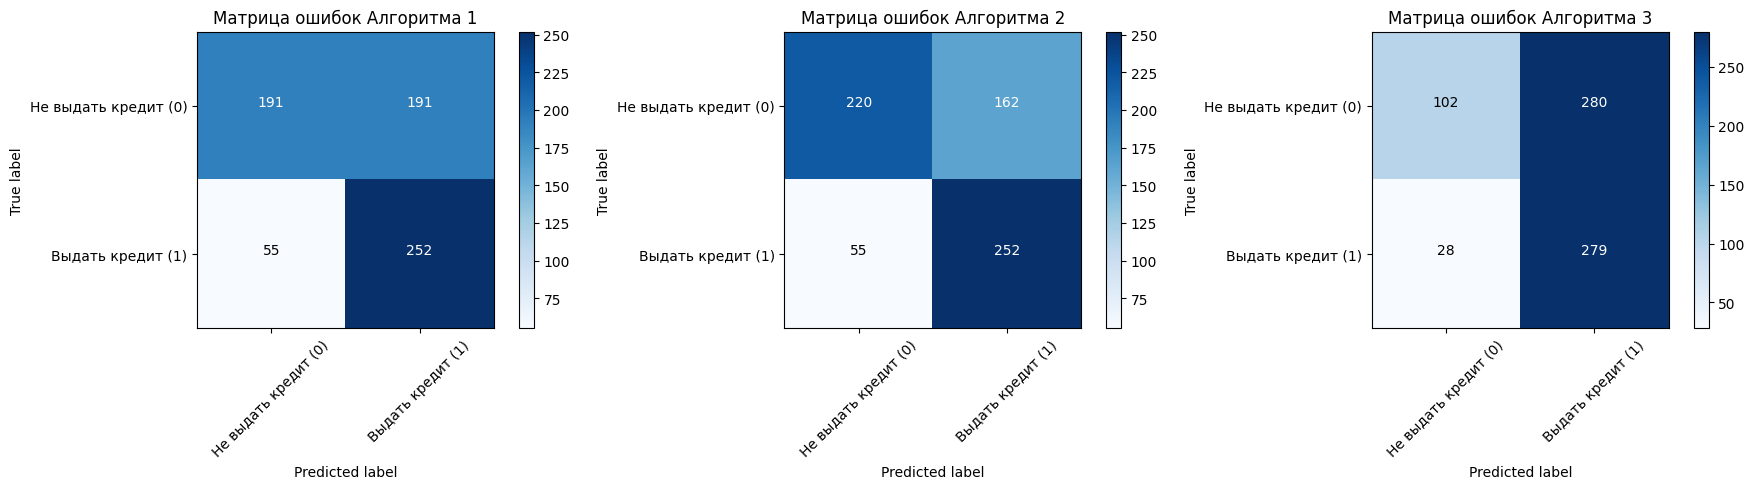

In [ ]:
from sklearn.metrics import f1_score

# Извлечение целевой переменной и предсказанных вероятностей для каждого алгоритма
target = df['target']                          # Целевая переменная из датафрейма df
pred1_probs = df['pred1_probs']                # Предсказанная вероятность для алгоритма 1
pred2_probs = df['pred2_probs']                # Предсказанная вероятность для алгоритма 2
pred3_probs = df['pred3_probs']                # Предсказанная вероятность для алгоритма 3

# Задаем шаг для перебора порога
threshold_step = 0.01
thresholds = np.arange(0, 1 + threshold_step, threshold_step)  # Пороги от 0 до 1 с шагом 0.01

# Функция для поиска оптимального порога для максимизации F1-score
def find_optimal_threshold_for_f1(pred_probs, target):
    best_f1 = 0
    best_threshold = 0

    for threshold in thresholds:
        # Применяем порог для получения предсказанных классов
        pred_classes = (pred_probs >= threshold).astype(int)

        # Вычисляем F1-score
        f1 = f1_score(target, pred_classes)

        # Сохраняем максимальный F1-score и соответствующий порог
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

# Находим оптимальные пороги и максимальный F1-score для каждого алгоритма
threshold1, f1_score1 = find_optimal_threshold_for_f1(pred1_probs, target)
threshold2, f1_score2 = find_optimal_threshold_for_f1(pred2_probs, target)
threshold3, f1_score3 = find_optimal_threshold_for_f1(pred3_probs, target)

# Выводим результаты
print(f"Алгоритм 1: Оптимальный порог = {threshold1:.2f}, Максимальный F1-score = {f1_score1:.4f}")
print(f"Алгоритм 2: Оптимальный порог = {threshold2:.2f}, Максимальный F1-score = {f1_score2:.4f}")
print(f"Алгоритм 3: Оптимальный порог = {threshold3:.2f}, Максимальный F1-score = {f1_score3:.4f}")

# Функция для получения предсказанных классов на основе оптимального порога
def get_predicted_classes(pred_probs, threshold):
    return (pred_probs >= threshold).astype(int)

# Вычисляем предсказанные классы для каждого алгоритма с использованием найденных порогов
pred1_classes_optimal = get_predicted_classes(pred1_probs, threshold1)
pred2_classes_optimal = get_predicted_classes(pred2_probs, threshold2)
pred3_classes_optimal = get_predicted_classes(pred3_probs, threshold3)

# Вычисляем матрицы ошибок для каждого алгоритма с оптимальными порогами
cm1_optimal = confusion_matrix(target, pred1_classes_optimal)  # Матрица ошибок для первого алгоритма
cm2_optimal = confusion_matrix(target, pred2_classes_optimal)  # Матрица ошибок для второго алгоритма
cm3_optimal = confusion_matrix(target, pred3_classes_optimal)  # Матрица ошибок для третьего алгоритма

# Визуализируем матрицы ошибок для каждого алгоритма
plt.figure(figsize=(18, 5))                                    # Устанавливаем размер графика

# Визуализация матрицы ошибок для первого алгоритма
plt.subplot(1, 3, 1)                                           # Создаем подграфик (1 строка, 3 колонки, первый график)
plot_confusion_matrix(cm1_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 1')

# Визуализация матрицы ошибок для второго алгоритма
plt.subplot(1, 3, 2)                                           # Второй подграфик
plot_confusion_matrix(cm2_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 2')

# Визуализация матрицы ошибок для третьего алгоритма
plt.subplot(1, 3, 3)                                           # Третий подграфик
plot_confusion_matrix(cm3_optimal, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Алгоритма 3')

# Отображаем все графики на экране
plt.tight_layout()
plt.show()


 **Вывод:** Модель с наименьшим количеством ложных положительных (нижняя левая) и ложных отрицательных (верхняя правая) исходов будет считаться наиболее эффективной. Получается, что наиболее эффективной моделью будет алгоритм 2

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



А я загуглил classification_report ещё в самом начале...

### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

Accuracy: 0.9203

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        84
           1       0.89      0.91      0.90        54

    accuracy                           0.92       138
   macro avg       0.92      0.92      0.92       138
weighted avg       0.92      0.92      0.92       138

Матрица ошибок:


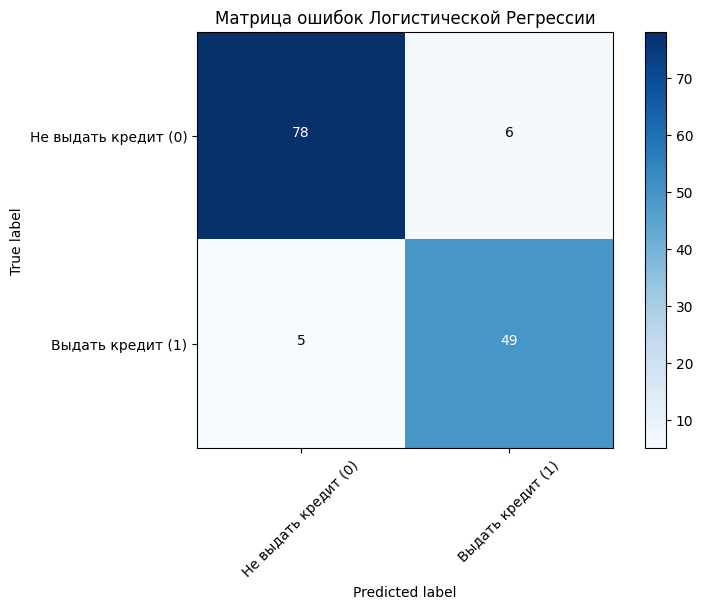

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np


# Функция для визуализации матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)      # Отображаем матрицу с цветовой картой
    plt.title(title)                                        # Устанавливаем заголовок графика
    plt.colorbar()                                          # Добавляем цветовую шкалу

    # Устанавливаем метки по оси x и y
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)            # Метки по оси x с поворотом на 45 градусов
    plt.yticks(tick_marks, classes)                         # Метки по оси y

    fmt = '.2f' if normalize else 'd'                       # Формат отображения значений
    thresh = cm.max() / 2.                                  # Порог для определения цвета текста (черный или белый)

    # Добавляем текстовые значения в ячейки матрицы
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()                                      # Уплотняем макет графика
    plt.ylabel('True label')                                # Подпись для оси y
    plt.xlabel('Predicted label')                           # Подпись для оси x



# Загрузка данных
df = pd.read_csv("credit_scoring_example1.csv")

# Отделяем целевую переменную от признаков
X = df.drop(columns=['target'])                             # Признаки
y = df['target']                                            # Целевая переменная

# Нормализация признаков
scaler = StandardScaler()                                   # Создаем объект StandardScaler для нормализации
X_normalized = scaler.fit_transform(X)                      # Нормализуем признаки

# Разделение данных на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()                                # Создаем объект логистической регрессии
model.fit(X_train, y_train)                                 # Обучаем модель на обучающих данных

# Предсказание на тестовых данных
y_pred = model.predict(X_test)                              # Получаем предсказания

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)                   # Вычисляем точность
print(f"Accuracy: {accuracy:.4f}")                          # Выводим точность

# Выводим отчет о классификации и матрицу ошибок
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))                # Отчет о классификации

print("Матрица ошибок:")
cm = confusion_matrix(y_test, y_pred)                       # Матрица ошибок

# Визуализируем матрицу ошибок графически
plt.figure(figsize=(8, 6))                                  # Устанавливаем размер графика
plot_confusion_matrix(cm, classes=['Не выдать кредит (0)', 'Выдать кредит (1)'],
                      title='Матрица ошибок Логистической Регрессии')
plt.show()                                                  # Отображаем график


**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность
    б) полноту
    в) f1-score.
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [ ]:
# Загрузка данных
df = pd.read_csv("credit_scoring_example1.csv")

# Отделяем целевую переменную от признаков
X = df.drop(columns=['target'])                          # Признаки
y = df['target']                                         # Целевая переменная

# Нормализация признаков
scaler = StandardScaler()                                # Создаем объект StandardScaler для нормализации
X_normalized = scaler.fit_transform(X)                   # Нормализуем признаки

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression()                             # Создаем объект логистической регрессии
model.fit(X_train, y_train)                              # Обучаем модель на обучающих данных

# Получение предсказанных вероятностей на тестовых данных
y_probs = model.predict_proba(X_test)[:, 1]              # Вероятности положительного класса

# Функция для поиска оптимального порога для заданной метрики
def find_optimal_threshold(y_true, y_probs, metric='accuracy'):
    thresholds = np.arange(0.0, 1.01, 0.01)              # Пороги от 0 до 1 с шагом 0.01
    best_value = -np.inf if metric != 'f1' else 0        # Инициализируем лучшее значение
    best_threshold = None

    for threshold in thresholds:
        # Применяем порог для получения предсказанных классов
        y_pred = (y_probs >= threshold).astype(int)

        # Вычисляем нужную метрику в зависимости от параметра metric
        if metric == 'accuracy':
            value = accuracy_score(y_true, y_pred)
        elif metric == 'recall':
            value = recall_score(y_true, y_pred)
        elif metric == 'precision':
            value = precision_score(y_true, y_pred)
        elif metric == 'f1':
            value = f1_score(y_true, y_pred)

        # Сохраняем максимальное значение и соответствующий порог
        if (metric != 'f1' and value > best_value) or (metric == 'f1' and value > best_value):
            best_value = value
            best_threshold = threshold

    return best_threshold, best_value

# Подбор порога для максимизации точности
threshold_accuracy, max_accuracy = find_optimal_threshold(y_test, y_probs, metric='accuracy')
print(f"Оптимальный порог для максимизации точности: {threshold_accuracy:.2f}, Максимальная точность: {max_accuracy:.4f}")

# Подбор порога для максимизации полноты
threshold_recall, max_recall = find_optimal_threshold(y_test, y_probs, metric='recall')
print(f"Оптимальный порог для максимизации полноты: {threshold_recall:.2f}, Максимальная полнота: {max_recall:.4f}")

# Подбор порога для максимизации F1-score
threshold_f1, max_f1 = find_optimal_threshold(y_test, y_probs, metric='f1')
print(f"Оптимальный порог для максимизации F1-score: {threshold_f1:.2f}, Максимальный F1-score: {max_f1:.4f}")

Оптимальный порог для максимизации точности: 0.53, Максимальная точность: 0.9348
Оптимальный порог для максимизации полноты: 0.00, Максимальная полнота: 1.0000
Оптимальный порог для максимизации F1-score: 0.53, Максимальный F1-score: 0.9159


**Логистическая регрессия**

Точность: 0.9348 (93.48%)

Полнота: 1.0000 (100%)

F1-score: 0.9159 (91.59%)

**Предыдущие модели**

Алгоритм 1: F1-score: 0.6720 (67.2%) , точность: 0.737 (73.7%)

Алгоритм 2: F1-score: 0.6990 (69.9%), точность: 0.833 (83.3%)

Алгоритм 3: F1-score: 0.6443 (64.43%), точность: низкая, так как все предсказания были положительными

Сравнение результатов

1. Точность:
логистическая регрессия показала максимальную точность в 93.48%, что значительно выше, чем у всех трёх предыдущих моделей.
2. Полнота:
полнота логистической регрессии может достигать 100%, но это достигается за счёт использования порога 0.00 (все примеры классифицируются как положительные).
3. F1-score:
логистическая регрессия достигла F1-score в 91.59%, что также значительно выше, чем у алгоритмов 1 и 3, но немного ниже, чем у алгоритма 2 (69.90%).


**Вывод**

Логистическая регрессия справилась лучше с задачей в целом по сравнению с алгоритмами 1 и 3 и показала сопоставимые результаты с алгоритмом 2 по F1-score при значительно более высокой точности.